## 1 - Descrição do problema




Exploração de dados de crédito de uma instituição financeira, com o intuito de trabalhar se um cliente é adimplente ou inadimplente (variável dependente representada pela coluna default). Visando assim entender o que faz um cliente desta mesma instituição deixar de honrar suas dívidas, tendo como base além do atributo de interesse, outros atributos como, por exemplo: salário, escolaridade, movimentação financeira, entre outros.

## 2 - Importação de bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 3 - Download, carregamento e geração de dados

In [2]:
df = pd.read_csv(
    '/content/drive/MyDrive/Python_M10_support material.csv',
    na_values='na') #leitura do arquivo contendo os dados de interesse e construção do dataframe

In [3]:
df.head(n=10) #método para listar as 10 primeiras linhas do dataframe

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## 4 - Exploração de dados

### 4.1 - Estrutura

In [4]:
df.shape #atributo que retorna uma tupla (quantidade de linhas e colunas) de todo o dataframe

(10127, 16)

In [5]:
#atributo que retorna uma tupla, com o dataframe filtrado apenas para os clientes adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [6]:
#atributo que retorna uma tupla, com o dataframe filtrado apenas para os clientes inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [7]:
#atribuição dos valores obtidos em variáveis (quantidade total de adimplentes e inadimplentes)
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
#relação relativa dos dados e/ou proporção de clientes adimplentes e inadimplentes
print(f'A proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%.')
print(f'A proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%.')

A proporcão de clientes adimplentes é de 83.93%.
A proporcão de clientes inadimplentes é de 16.07%.


In [9]:
#encadeamento de métodos para verificar a proporção de adimplentes e inadimplentes em diferentes escolaridades
(df
    .loc[:, ['escolaridade', 'default']] #seleciona as colunas de interesse
    .groupby('escolaridade') #agrupa os clientes por escolaridade
    .value_counts(normalize=True) #retorna a proporção de adimplentes e inadimplentes
    .unstack() #reorganização do dataframe
    .applymap(lambda x: f'{x:.2%}') #formatação para exibir os valores como porcentagem
)

default,0,1
escolaridade,,
doutorado,80.66%,19.34%
ensino medio,84.80%,15.20%
graduacao,84.80%,15.20%
mestrado,84.43%,15.57%
sem educacao formal,84.06%,15.94%


In [10]:
#encadeamento de métodos para verificar a proporção de adimplentes e inadimplentes em diferentes faixas salariais
(df
    .loc[:, ['salario_anual', 'default']] #seleciona as colunas de interesse
    .groupby('salario_anual') #agrupa os clientes por salario_anual
    .value_counts(normalize=True) #retorna a proporção de adimplentes e inadimplentes
    .unstack() #reorganização do dataframe
    .applymap(lambda x: f'{x:.2%}') #formatação para exibir os valores como porcentagem
)

default,0,1
salario_anual,,
$120K +,82.67%,17.33%
$40K - $60K,84.86%,15.14%
$60K - $80K,86.52%,13.48%
$80K - $120K,84.23%,15.77%
menos que $40K,82.81%,17.19%


### 4.2 - Schema
Avaliação da consistência entre o tipo de informação que cada coluna está representando e o tipo de dado.

In [11]:
df.head(n=5) #método para listar as 5 primeiras linhas do dataframe

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


#### a - Colunas e seus respectivos dados







In [12]:
df.describe() #método para obter informações estatísticas do dataframe

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [13]:
df.info() #método para obter informações sobre o dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [14]:
df.dtypes #atributo para obter o tipo de dado de cada coluna do dataframe

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [15]:
#encadeamento de métodos para obter informações estatísticas de colunas categóricas do dataframe
(df
    .select_dtypes('object') #seleção de colunas textuais
    .describe() #obtenção de estatísticas
    .transpose() #transposição de linhas e colunas
)

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [16]:
#encadeamento de métodos para obter informações estatísticas de colunas numéricas do dataframe
(df
    .drop('id', axis=1) #remoção da coluna id
    .select_dtypes('number') #seleção das colunas numéricas
    .describe() #obtenção de estatísticas
    .transpose() #transposição de linhas e colunas
)

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [17]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


#### b - Dados faltantes

In [18]:
#encadeamento de métodos para verificar se há dados faltantes
(df
    .isna() #retorna dataframe de True ou False, onde True são entradas nulas
    .any()  #retorna série de True ou False, onde True indica se há ao menos um valor True na coluna
)

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [19]:
#função para levantar estatísticas sobre os dados faltantes
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [20]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [21]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [22]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 5 - Transformação e limpeza de dados

In [23]:
#atributo para obter o tipo de dado das colunas de interesse do dataframe
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [24]:
#método para listar as 5 primeiras linhas das colunas de interesse do dataframe
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [25]:
#função para limpar os dados, com teste de aplicação através do método funcional map
fn = lambda valor: float(valor.replace('.', '').replace(',', '.'))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [26]:
#função de limpeza aplicada nas colunas de interesse
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [27]:
df.dtypes #atributo para obter o tipo de dado de cada coluna do dataframe após a limpeza

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

### 5.1 - Atributos categóricos

In [28]:
#encadeamento de métodos para obter informações estatísticas de colunas categóricas do dataframe
(df
    .select_dtypes('object') #seleção de colunas textuais
    .describe() #obtenção de estatísticas
    .transpose() #transposição de linhas e colunas
)

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


### 5.2 - Atributos numéricos


In [29]:
#encadeamento de métodos para obter informações estatísticas de colunas numéricas do dataframe
(df
    .drop('id', axis=1) #remoção da coluna id
    .select_dtypes('number') #seleção das colunas numéricas
    .describe() #obtenção de estatísticas
    .transpose() #transposição de linhas e colunas
)

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [30]:
#método para remover os dados faltantes do dataframe
df.dropna(inplace=True)

In [31]:
#atributo para obter a quantidade de linhas e colunas do dataframe
df.shape

(7081, 16)

In [32]:
#atributo para obter a quantidade de linhas e colunas, com o dataframe filtrado apenas para os clientes adimplentes
df[df['default'] == 0].shape

(5968, 16)

In [33]:
#atributo para obter a quantidade de linhas e colunas, com o dataframe filtrado apenas para os clientes inadimplentes
df[df['default'] == 1].shape

(1113, 16)

In [34]:
#atribuição dos valores obtidos em variáveis (quantidade total de adimplentes e inadimplentes)
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [35]:
#relação relativa dos dados e/ou proporção de clientes adimplentes e inadimplentes
print(f'A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%.')
print(f'A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%.')
print('')
print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%.')
print(f'A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%.')

A proporcão adimplentes ativos é de 83.93%.
A nova proporcão de clientes adimplentes é de 84.28%.

A proporcão clientes inadimplentes é de 16.07%.
A nova proporcão de clientes inadimplentes é de 15.72%.


## 6 - Visualização de dados
 Diversas visualizações para correlacionar variáveis explicativas com a variável resposta buscando entender qual fator leva um cliente a inadimplência; sempre comparando a base de dados com todos os clientes com a base de adimplentes e inadimplentes.

In [36]:
#função para definir o estilo do gráfico
sns.set_style('whitegrid')

In [37]:
#criação de um novo dataframe apenas com os clientes adimplentes
df_adimplente = df[df['default'] == 0]

In [38]:
#criação de um novo dataframe apenas com os clientes inadimplentes
df_inadimplente = df[df['default'] == 1]

Figura 1


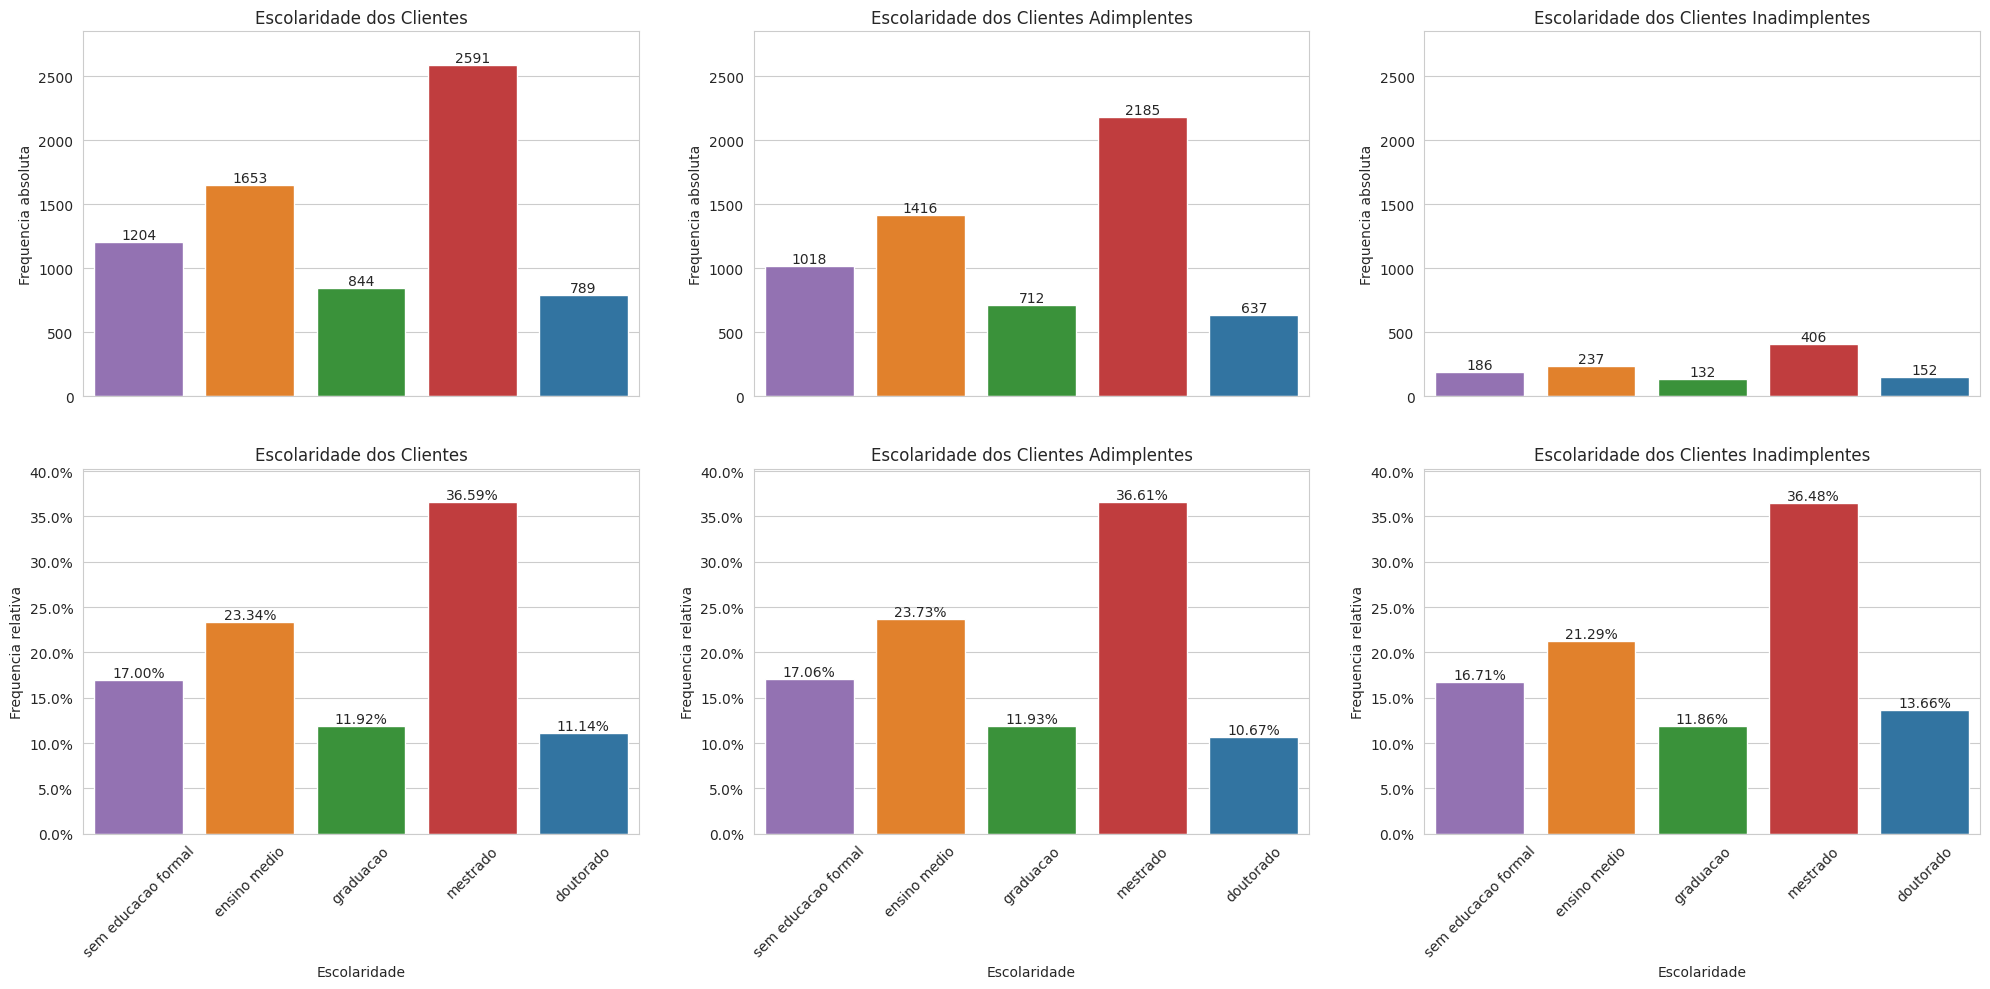

In [39]:
#criação dos gráficos de frequência absoluta e relativa considerando escolaridade
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes',
           'Escolaridade dos Clientes Inadimplentes']
ordem = ['sem educacao formal','ensino medio','graduacao','mestrado','doutorado']

figura, eixos = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

frequencias = [(0, 'count', 'frequencia_absoluta', False), (1, 'proportion', 'frequencia_relativa', True)]

max_y = 0
max_abs = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
max_rel = df.select_dtypes('object').describe()[coluna]['freq'] / \
    df.select_dtypes('object').describe()[coluna]['count'] * 1.1

for j, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    for i, func, nome, normalize in frequencias:
        df_to_plot = dataframe[coluna].value_counts(normalize=normalize).to_frame()
        df_to_plot.rename(columns={func: nome}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.reset_index(inplace=True, drop=True)
        df_to_plot.sort_values(by=[coluna], inplace=True)

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot[nome],
                        hue=df_to_plot[coluna], ax=eixos[i, j], order=ordem)
        f.set(title=titulos[j], xlabel=coluna.capitalize().replace('_', ' '),
            ylabel=nome.capitalize().replace('_', ' '))
        f.tick_params(axis='x', labelrotation=45)

        max_y = max_abs

        if normalize:
            f.yaxis.set_major_formatter(ticker.PercentFormatter(1))
            max_y = max_rel
            for container in f.containers:
                f.bar_label(container, fmt='{:.2%}')
        else:
            for container in f.containers:
                f.bar_label(container)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))
print('Figura 1')
figura.tight_layout(h_pad=3, w_pad=3)
figura.show()

Figura 2


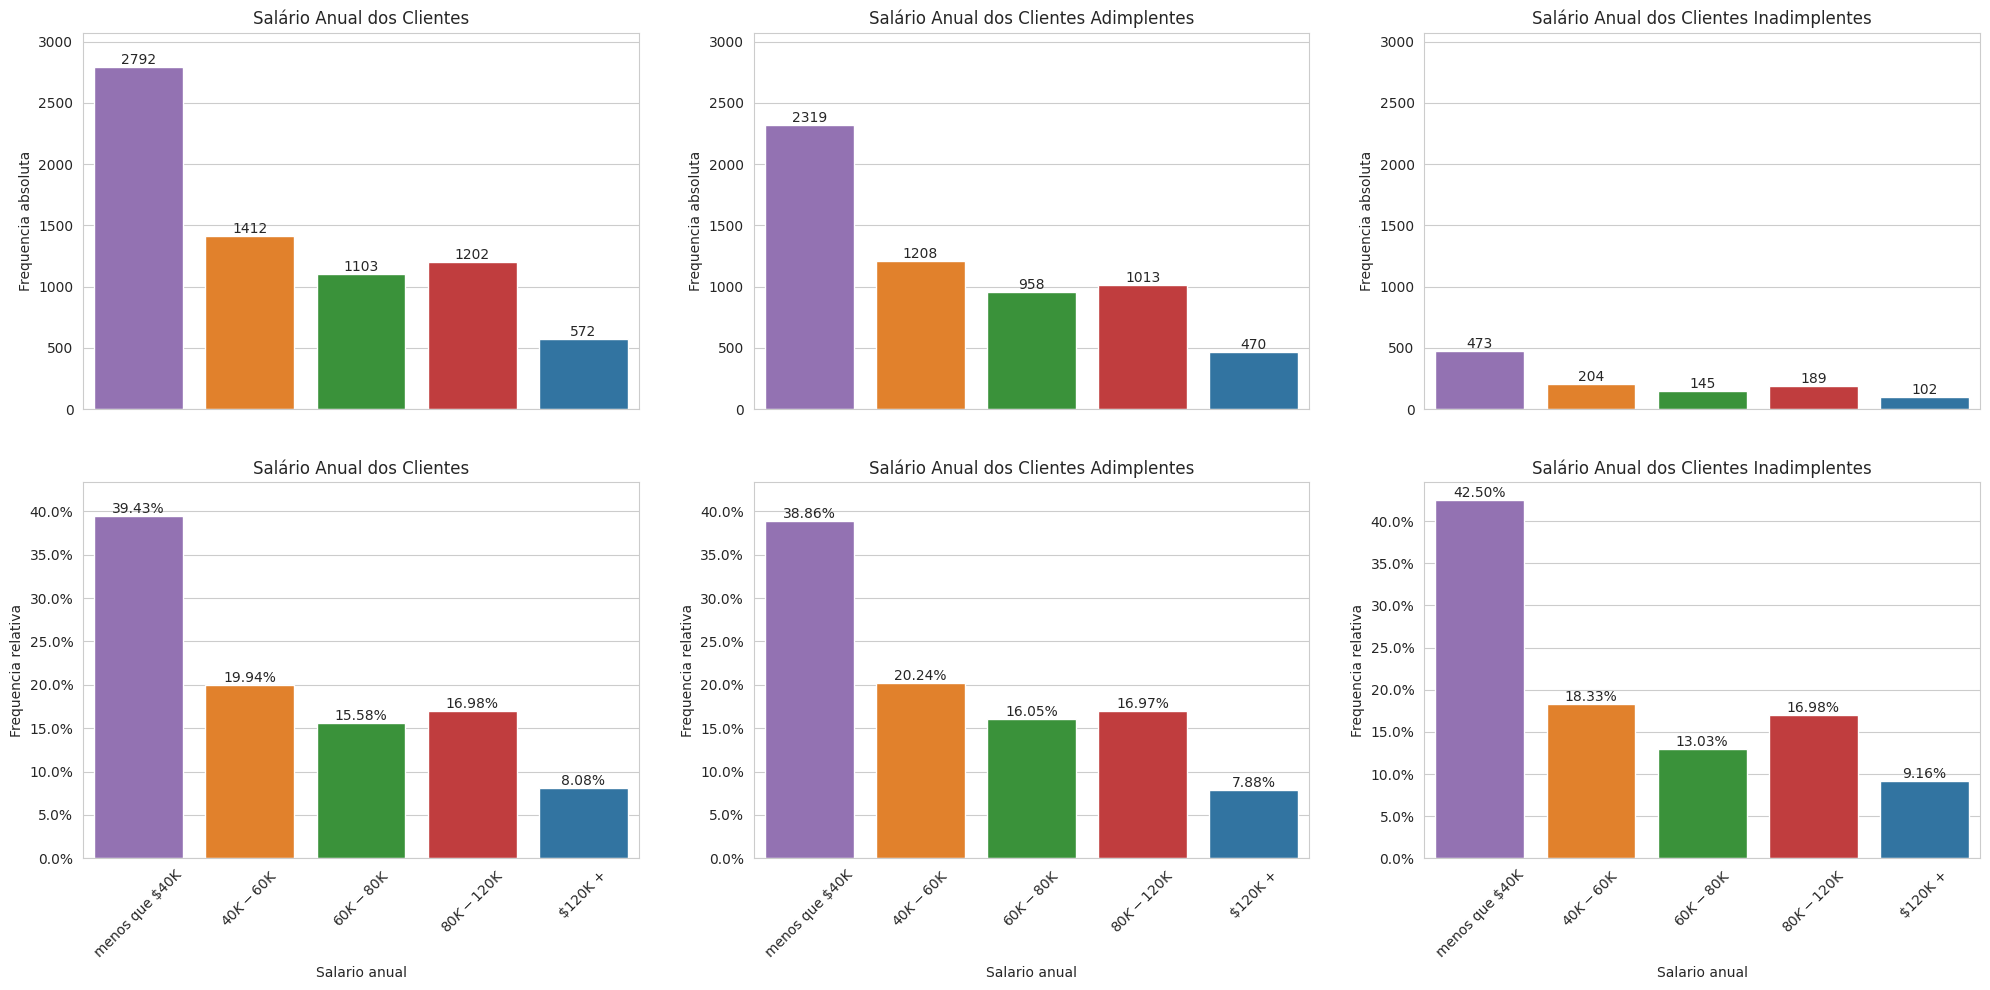

In [40]:
#criação dos gráficos de frequência absoluta e relativa considerando salário anual
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes',
           'Salário Anual dos Clientes Adimplentes',
           'Salário Anual dos Clientes Inadimplentes']
ordem = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +']

figura, eixos = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

frequencias = [(0, 'count', 'frequencia_absoluta', False), (1, 'proportion', 'frequencia_relativa', True)]

max_y = 0
max_abs = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
max_rel = df.select_dtypes('object').describe()[coluna]['freq'] / \
    df.select_dtypes('object').describe()[coluna]['count'] * 1.1

for j, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    for i, func, nome, normalize in frequencias:
        df_to_plot = dataframe[coluna].value_counts(normalize=normalize).to_frame()
        df_to_plot.rename(columns={func: nome}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.reset_index(inplace=True, drop=True)
        df_to_plot.sort_values(by=[coluna], inplace=True)

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot[nome],
                        hue=df_to_plot[coluna], ax=eixos[i, j], order=ordem)
        f.set(title=titulos[j], xlabel=coluna.capitalize().replace('_', ' '),
            ylabel=nome.capitalize().replace('_', ' '))
        f.tick_params(axis='x', labelrotation=45)

        max_y = max_abs

        if normalize:
            f.yaxis.set_major_formatter(ticker.PercentFormatter(1))
            max_y = max_rel
            for container in f.containers:
                f.bar_label(container, fmt='{:.2%}')
        else:
            for container in f.containers:
                f.bar_label(container)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

print('Figura 2')
figura.tight_layout(h_pad=3, w_pad=3)
figura.show()

Figura 3


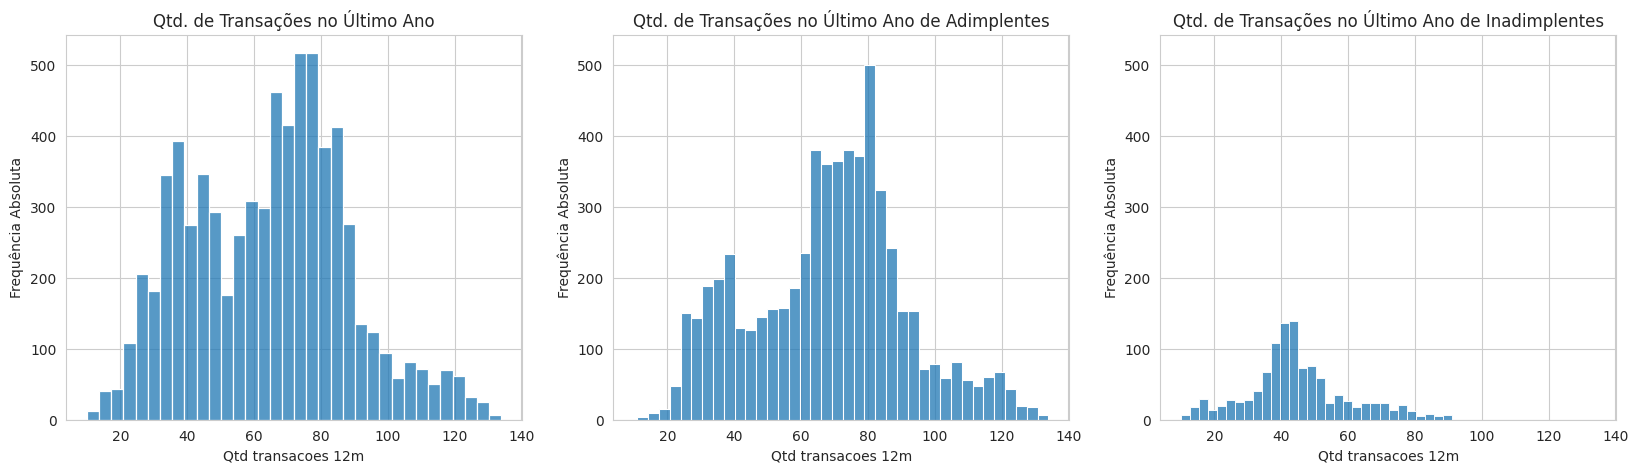

In [41]:
#criação dos gráficos de frequência absoluta/ quantidade de transações no último ano
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano',
           'Qtd. de Transações no Último Ano de Adimplentes',
           'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize().replace('_', ' '),
          ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1
print('Figura 3')
figura.show()

Figura 4


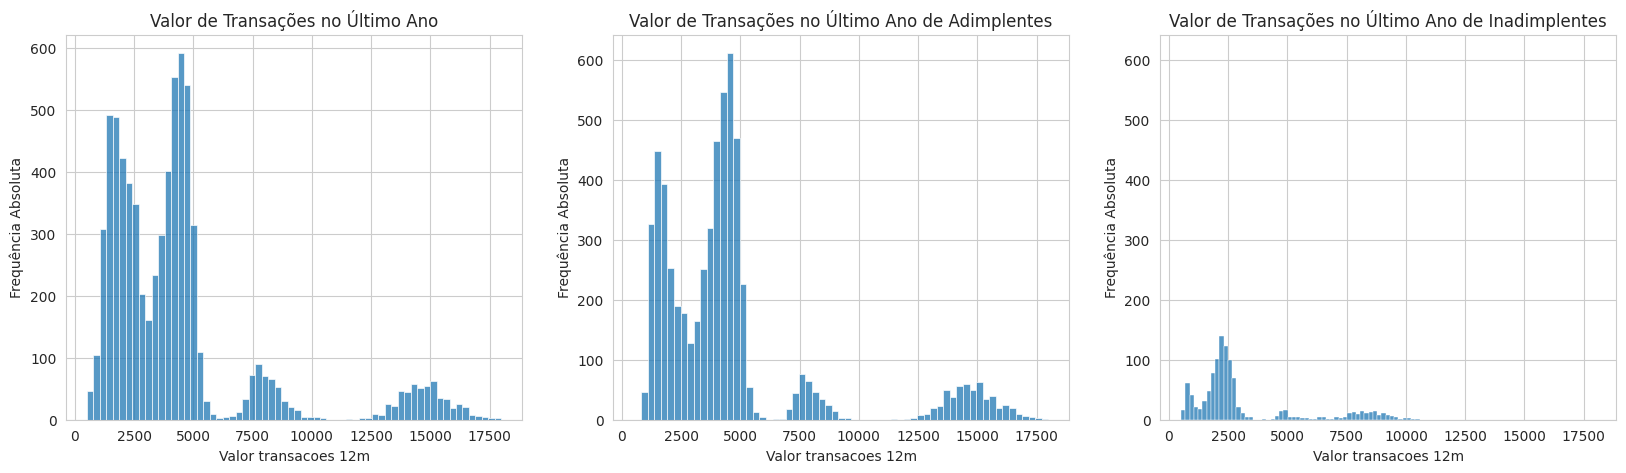

In [42]:
#criação dos gráficos de frequência absoluta/ valor de transações no último ano
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações no Último Ano',
           'Valor de Transações no Último Ano de Adimplentes',
           'Valor de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize().replace('_', ' '),
          ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1
print('Figura 4')
figura.show()

Figura 5


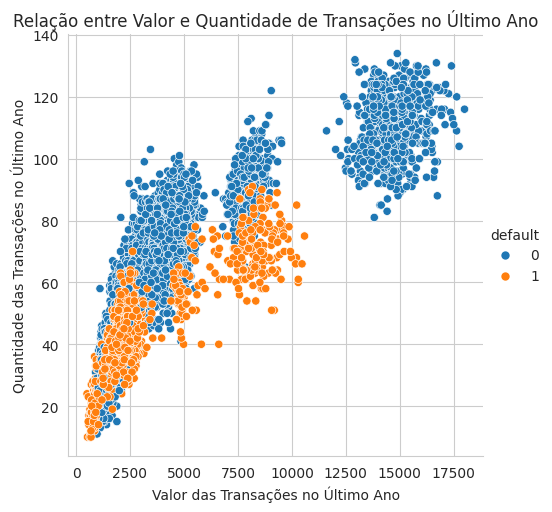

In [43]:
 #criação do gráfico de relação entre valor e quantidade de transações no último ano
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)
print('Figura 5')
figura.show()

In [44]:
# remoção de outliers da variável valor_transacoes_12m
q1 = df['valor_transacoes_12m'].quantile(0.25)
q3 = df['valor_transacoes_12m'].quantile(0.75)
iqr = q3 - q1
df_sem_outliers = df[(df['valor_transacoes_12m'] >= q1 - 1.5 * iqr) & (df['valor_transacoes_12m'] <= q3 + 1.5 * iqr)]

Figura 6


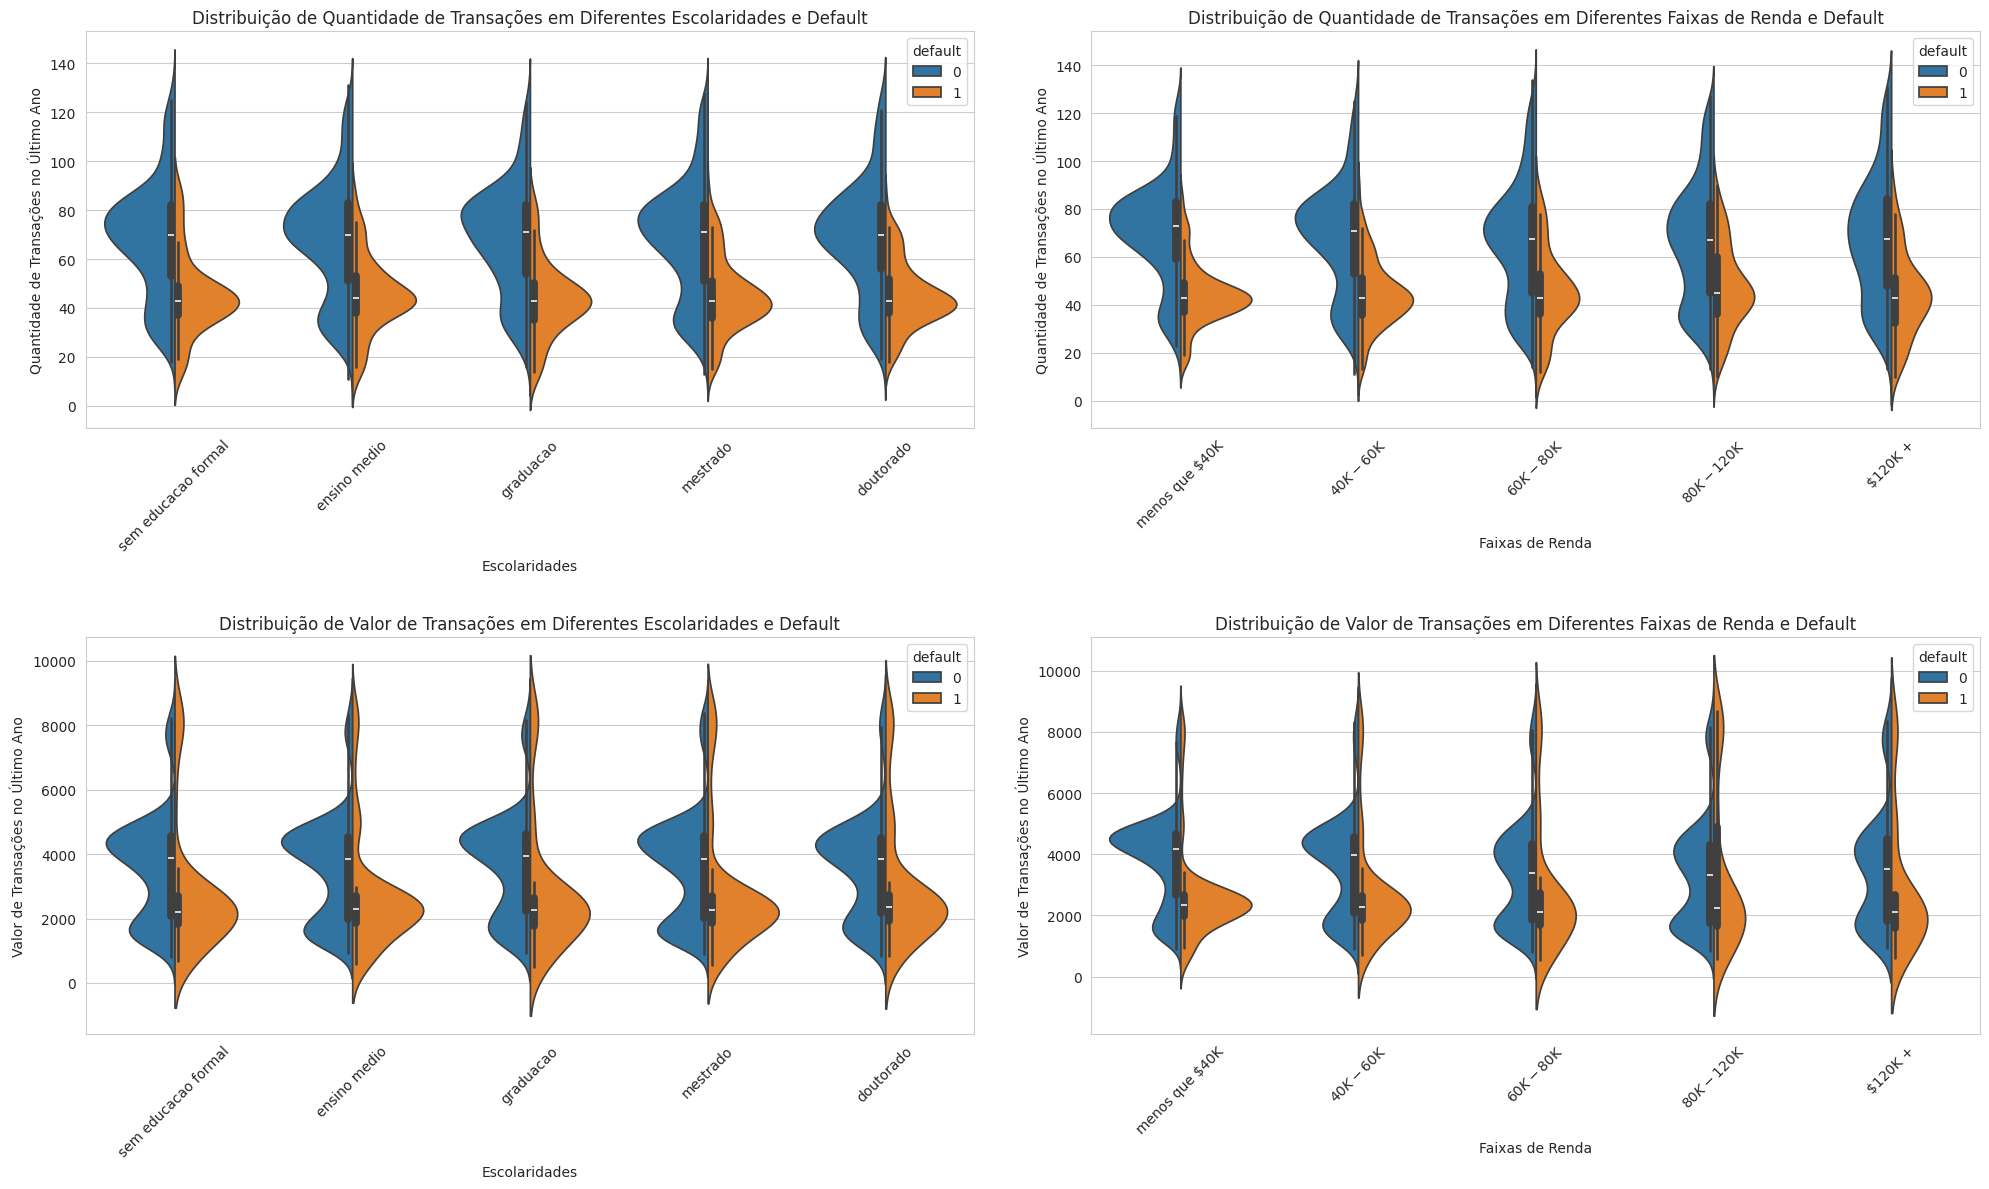

In [45]:
#criação do gráfico de distribuição quantidade de transações, valor de transações em diferentes escolaridades e faixas rendas e default
numericas = ['qtd_transacoes_12m', 'valor_transacoes_12m']
categoricas = ['escolaridade', 'salario_anual']
dados = {
    'qtd_transacoes_12m': df,
    'valor_transacoes_12m': df_sem_outliers
}
ordem = {
    'escolaridade': ['sem educacao formal','ensino medio','graduacao','mestrado','doutorado'],
    'salario_anual': ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +']
}
titulo = {
    'valor_transacoes_12m': 'Valor de Transações',
    'qtd_transacoes_12m': 'Quantidade de Transações',
    'escolaridade': 'Escolaridades',
    'salario_anual': 'Faixas de Renda'
}

figura, eixos = plt.subplots(2, 2, figsize=(20, 12))

for i, num in enumerate(numericas):
    for j, cat in enumerate(categoricas):
        f = sns.violinplot(
            data=dados[num], x=cat, y=num, hue='default',
            split=True, order=ordem[cat], ax=eixos[i, j]
        )
        _ = f.set(
            title=f'Distribuição de {titulo[num]} em Diferentes {titulo[cat]} e Default',
            xlabel=titulo[cat],
            ylabel=f'{titulo[num]} no Último Ano'
        )

        f.tick_params(axis='x', labelrotation=45)
print('Figura 6')
figura.tight_layout(h_pad=3, w_pad=3)
figura.show()

## 7 - Storytelling


### 7.1 - Insights











**Figura 1**


---


*Comportamento dos clientes adimplentes (não default) e inadimplentes (default) com relação a escolaridade.*


Dos clientes adimplentes, quase 25% possui ensino médio. Dentre os inadimplentes, a proporção de pessoas com ensino médio é de um pouco mais de 20%.

Dos tomadores adimplentes, aproximadamente 10% tem doutorado. Na subamostra de inadimplentes, essa proporção é de quase 15%.

Nos demais níveis de escolaridade, não se observa diferença importante em suas participações nas amostras de adimplentes e inadimplentes.











**Figura 2**



---



*Comportamento dos clientes adimplentes (não default) e inadimplentes (default) com relação ao salário anual.*

Os clientes na faixa salarial de 40k ou menos representam menos de 39% dos adimplentes da amostra. Na subamostra de inadimplentes, os clientes nessa categoria de salário anual chegam a 42,5%.

Dos clientes adimplentes aproximadamente 20% recebem entre 40k e 60k por ano. Dentre os inadimplentes, a proporção de pessoas que recebem entre 40k e 60k é de pouco menos de 20%.

Dos tomadores adimplentes, pouco mais de 15% recebem  entre 60k a 80k por ano. Na subamostra de inadimplentes, essa proporção é de quase 15%.

Dentre os que recebem entre 80k a 120k por ano, não se observa diferença significativa em suas participações nas amostras de adimplentes e inadimplentes.

Já os clientes na faixa salarial de 120k ou mais representam menos de 8% dos adimplentes da amostra, enquanto na subamostra de inadimplentes, os clientes nessa categoria de salário chegam a uma participação de mais de 9%.

**Figura 3**



---



*Comportamento dos clientes adimplentes (não default) e inadimplentes (default) com relação a quantidade de transações no último ano.*


Dos clientes adimplentes, a maioria relizou cerca de 60 a 80 transações no último ano. Na subamostra de inadimplentes, os clientes realizaram cerca de 40 transações no último ano.






**Figura 4**



---



*Comportamento dos clientes adimplentes (não default) e inadimplentes (default) com relação ao valor de transações no último ano.*

Dos tomadores adimplentes, a maioria relizou transações mais próximas ao valor de 5000.

Dentre os inadimplentes, a maioria fez transações mais próximas ao valor de 2500.

**Figura 5**



---



*Relação entre o valor e a quantidade de transações no último ano, dos clientes adimplentes (não default) e inadimplentes (default).*

 A relação mostra que no geral o perfil dos tomadores adimplentes engloba tanto clientes com menores quantidades de transações com valores mais baixos, quanto clientes com maiores quantidades de transações e valores mais elevados.

Com relação a parte inadimplente, esta é caracterizada por clientes que fizeram menores quantidades de transações e com valores mais baixos.

Dentre os inadimplentes, poucos fizeram transações com valores mais altos.



**Figura 6**



---



*Distribuição da quantidade de transações, valor de transações em diferentes escolaridades e, quantidade de transações, valor de transações em diferentes faixas de renda, dos clientes adimplentes (não default) e inadimplentes (default)*.

Independente se possuem ou não escolaridade, os clientes adimplentes realizaram maiores quantidades de transações e estas tiveram valores variáveis.

Nas subamostras de inadimplentes, a maioria dos clientes realizaram em torno de 40 transações no último ano caracterizadas por possuírem valores mais baixos, próximos em geral a quantia de 2000. Essa tendência é para aqueles com salário igual ou maior que 60k ao ano.

Nas subamostras de adimplentes, o pico da distribuição do número de transações no último ano é próximo a 80 e os valores de transações ficaram um pouco acima de 4000. Assim como, a distribuição de ambas as variáveis é menos concentrada para aqueles com salário igual ou maior que 60k ao ano.


### 7.2 - Conclusões

A primeira observação analisando todos os gráficos é que as variáveis que apresentam maior associação aparente com inadimplência na amostra analisada são Quantidade de transações no último ano e Valor de transações no último ano.



Analisando os gráficos das figuras 1 e 2, escolaridade e salário anual não possuem uma associação tão forte com a variável alvo, apesar de se observar tendências em algumas classes.



No caso da escolaridade, clientes com ensino médio possuem maior representação na amostra de adimplentes. A categoria com doutorado apresenta o comportamento oposto, sendo mais representativa entre inadimplentes. Analisando salário anual, observa-se que as faixas de renda intermediária estão em maior proporção no grupo de inadimplentes do que de adimplentes, enquanto aqueles com menos de 40k ou mais de 120k são mais presentes dentre os adimplentes.



Avaliando os gráficos das figuras 5 e 6, observa-se que os clientes simultaneamente com mais de 80 transações no último ano e valores de transações superior a 4000 representam um grupo quase na totalidade de clientes adimplentes. A exceção dessa regra possivelmente se dá nas faixas de renda superiores a 60k, segundo os gráficos da figura 6, que relacionam salário anual com quantidade e valores de transações, em que a distribuição dessas variáveis numéricas é menos concentrada entre adimplentes e inadimplentes.